In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(39717, 111)

In [6]:
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## It is observed that there are a lot of columns with all null values. Let's first remove them

In [7]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## There are several columns which are single valued. 
- They cannot contribute to our analysis in any way. So removing them.

In [8]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them. 
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them. 
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

### List of post-approval features
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [9]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [10]:
loan_data.shape

(39717, 21)

In [11]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [12]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [13]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "revol_util". 
 - So before doing that, lets see what kind of data each column has. 

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
loan_amnt              38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
dti                    38577 non-null float64
earliest_cr_line       38577 non-null object
inq_last_6mths         38577 non-null int64
open_acc               38577 non-null int64
pub_rec                38577 non-null int64
revol_util             38527 non-nul

In [15]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [16]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [17]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

## Standardizing the data 
- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [18]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [19]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [20]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [21]:
loan_data.head(100)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.00000,36 months,10.65,162.87,B,B2,10,RENT,24000.00,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.00000,60 months,15.27,59.83,C,C4,0,RENT,30000.00,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.00000,36 months,15.96,84.33,C,C5,10,RENT,12252.00,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.00000,36 months,13.49,339.31,C,C1,10,RENT,49200.00,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.00,37
5,5000,5000.00000,36 months,7.90,156.46,A,A4,3,RENT,36000.00,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12
6,7000,7000.00000,60 months,15.96,170.08,C,C5,8,RENT,47004.00,...,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.60,11
7,3000,3000.00000,36 months,18.64,109.43,E,E1,9,RENT,48000.00,...,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,87.50,4
8,5600,5600.00000,60 months,21.28,152.39,F,F2,4,OWN,40000.00,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.60,13
9,5375,5350.00000,60 months,12.69,121.45,B,B5,0,RENT,15000.00,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.50,3
10,6500,6500.00000,60 months,14.65,153.45,C,C3,5,OWN,72000.00,...,Dec-11,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,20.60,23


## Outlier Treatment

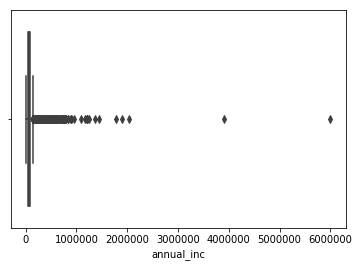

In [22]:
sns.boxplot(loan_data['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [23]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [24]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

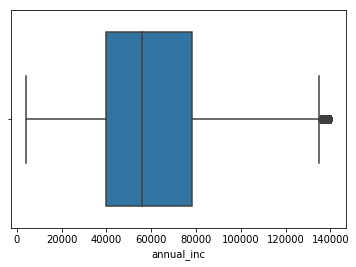

In [25]:
sns.boxplot(loan_data.annual_inc)

### Analyzing the "open_acc" column

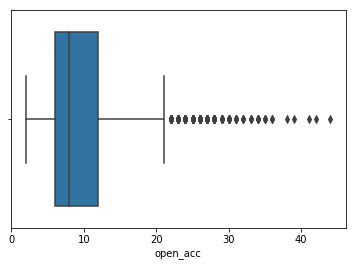

In [26]:
sns.boxplot(loan_data.open_acc)

In [27]:
loan_data.open_acc.quantile([0.95,0.97,0.98,0.99,0.995,0.997,0.999,1.0])

0.950    17.0
0.970    19.0
0.980    20.0
0.990    22.0
0.995    24.0
0.997    26.0
0.999    30.0
1.000    44.0
Name: open_acc, dtype: float64

## Still not sure about this. Let's discuss , think and do something tommorrow

- The quantile info of the column here shows a continous behavior of the variable
- But there is a drastic increase for the last 0.1 percent and hence removing these.

In [28]:
per_999_open_acc = loan_data.open_acc.quantile(0.999)
loan_data = loan_data[loan_data.open_acc < per_999_open_acc]

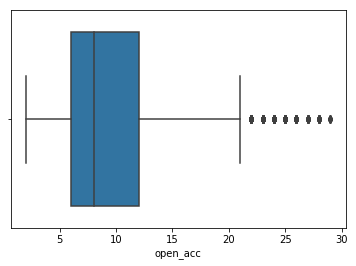

In [29]:
sns.boxplot(loan_data.open_acc)

### Visualizing Categorical Data 

####  1.Analyzing home_ownership

In [30]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [31]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [32]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

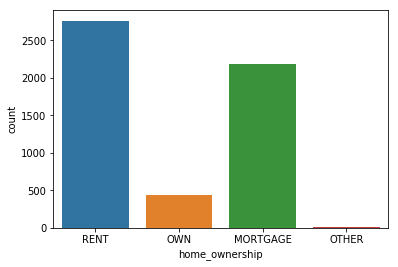

In [33]:
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

####  2.Analyzing purpose

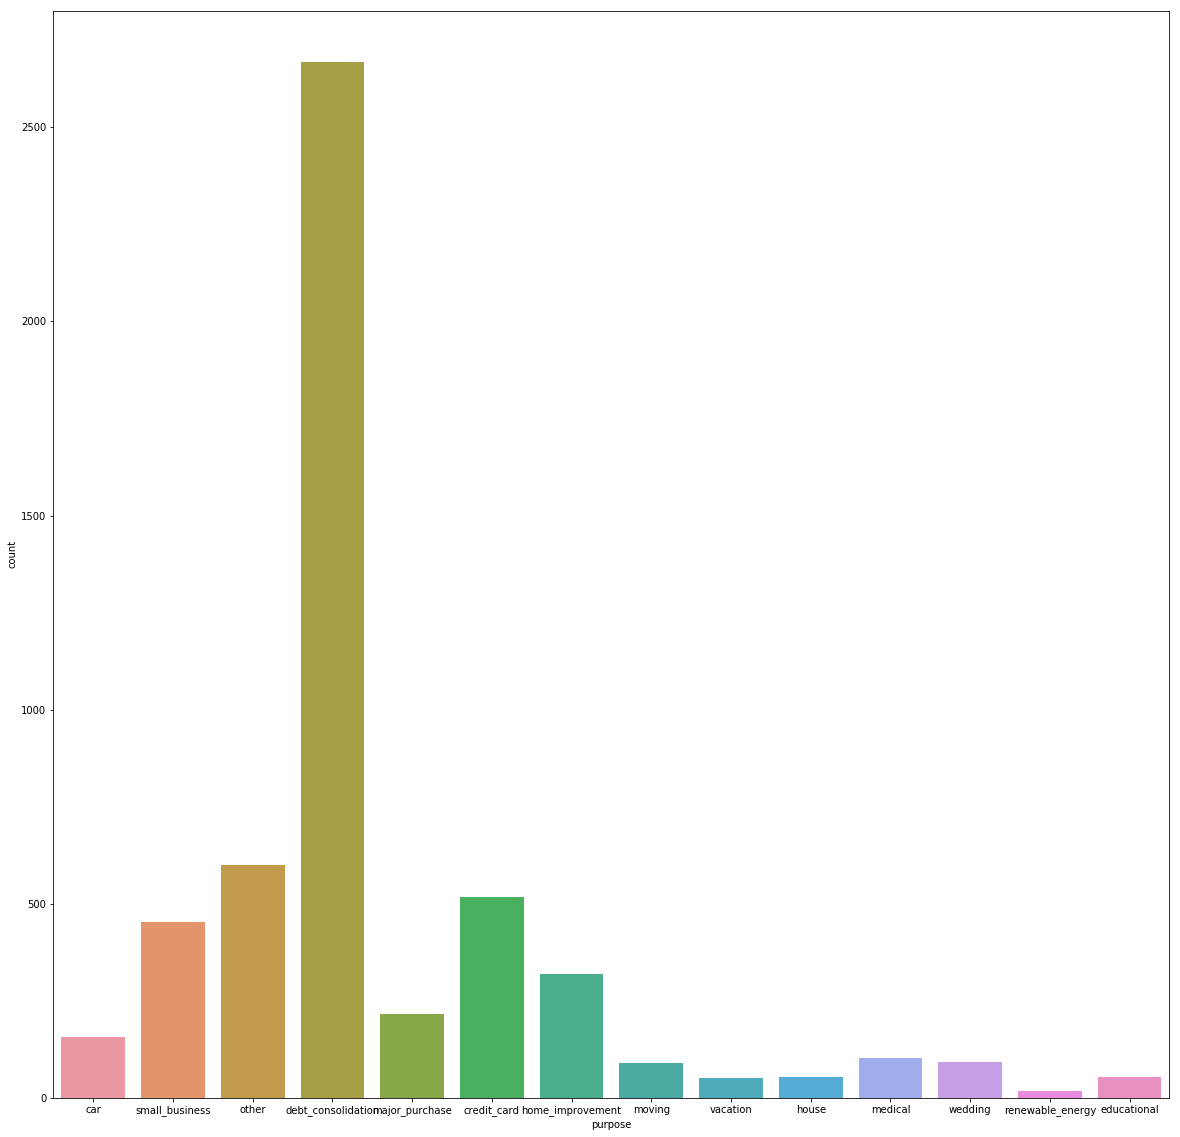

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(x='purpose', data=loan_data[loan_data['loan_status']=='Charged Off'])


#### Creating bins for some numerical variable to make them categorical

In [44]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0)
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'], bins=5,precision =0)
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0)
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0)
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0)

In [45]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,1,3,0,83.7,9,"(9.0, 13.0]","(2.0, 7.0]","(80.0, 100.0]","(2.0, 20.0]","(3864.0, 31201.0]"
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,5,3,0,9.4,4,"(13.0, 17.0]","(2.0, 7.0]","(-0.1, 20.0]","(2.0, 20.0]","(3864.0, 31201.0]"
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,2,0,98.5,10,"(13.0, 17.0]","(2.0, 7.0]","(80.0, 100.0]","(2.0, 20.0]","(3864.0, 31201.0]"
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,1,10,0,21.0,37,"(13.0, 17.0]","(7.0, 13.0]","(20.0, 40.0]","(20.0, 37.0]","(31201.0, 58402.0]"
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,3,9,0,28.3,12,"(5.0, 9.0]","(7.0, 13.0]","(20.0, 40.0]","(2.0, 20.0]","(31201.0, 58402.0]"


####  3.Analyzing interest rate wrt the interest rate bins created

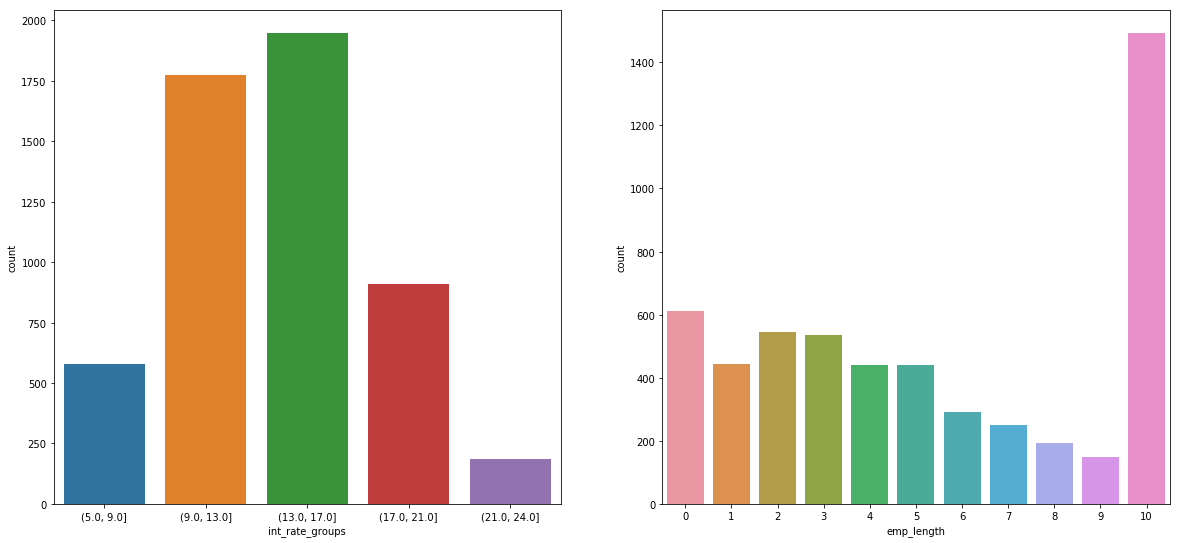

In [71]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### 4.Similarly analyzing open_acc,revol_util,total_acc,annual_inc

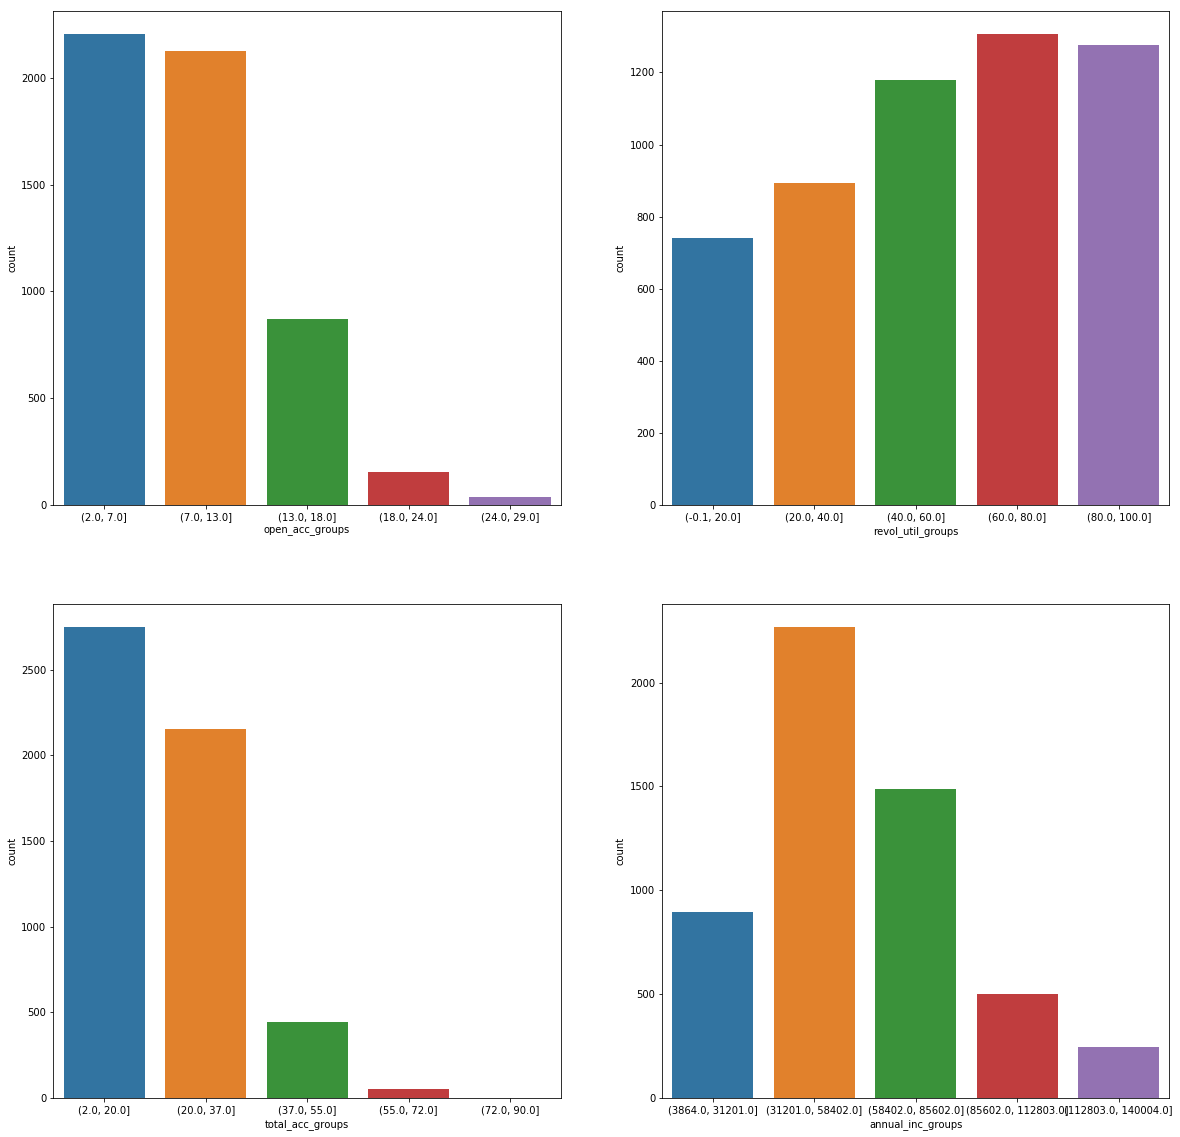

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='open_acc_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='revol_util_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(223)
sns.countplot(x='total_acc_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(224)
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

### The above values suggest that the following are most likely to default
- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts 
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10